### Time Series Analysis
<p>Time series analysis involves using historical data time-ordered data to <b>understand treds, detect patterns and forecast future values</b> using statistical and ML Models.</p>

#### Time Series Analysis Steps

#### 1. Loading and Visulizing Time Series Data

In [1]:
import pandas as pd 
import numpy as np

In [2]:
#Preparing Dummy Data
date_range = pd.date_range(start='2023-1-1', end='2023-1-31', freq='D')

In [3]:
date_range

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

In [5]:
data = pd.Series(range(len(date_range)), index=date_range)

In [6]:
data

2023-01-01     0
2023-01-02     1
2023-01-03     2
2023-01-04     3
2023-01-05     4
2023-01-06     5
2023-01-07     6
2023-01-08     7
2023-01-09     8
2023-01-10     9
2023-01-11    10
2023-01-12    11
2023-01-13    12
2023-01-14    13
2023-01-15    14
2023-01-16    15
2023-01-17    16
2023-01-18    17
2023-01-19    18
2023-01-20    19
2023-01-21    20
2023-01-22    21
2023-01-23    22
2023-01-24    23
2023-01-25    24
2023-01-26    25
2023-01-27    26
2023-01-28    27
2023-01-29    28
2023-01-30    29
2023-01-31    30
Freq: D, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

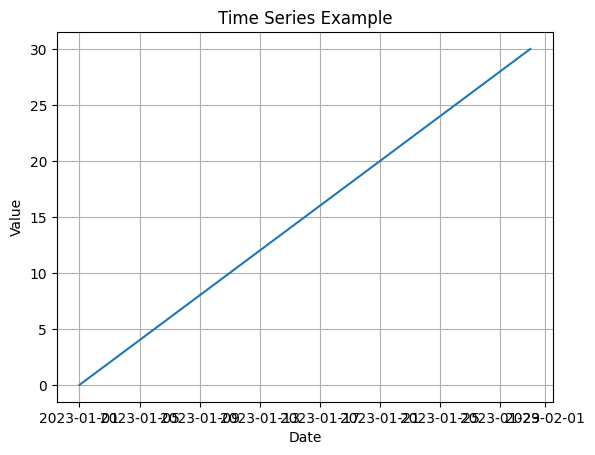

In [8]:
# Plotting the time series
plt.plot(data)
plt.title("Time Series Example")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid()
plt.show()

#### 2. Components of Time Series
- Trends -> Long-Term increase/decrease
- Seasonality -> Regular Pattern (weekly, monthly, quartly etc)
- Noise -> Irregular / Random Variation

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

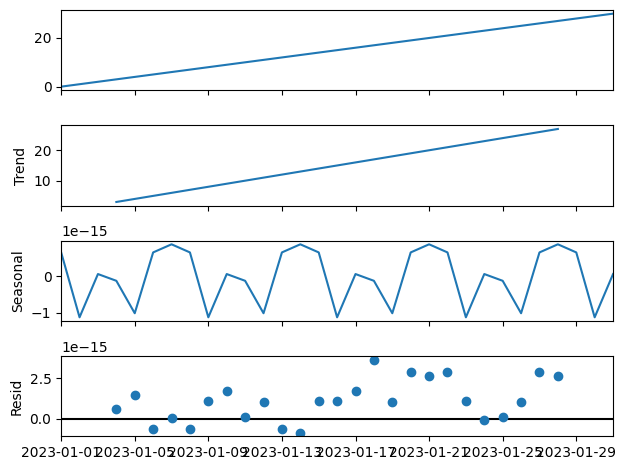

In [10]:
result = seasonal_decompose(data, model='additive')
result.plot()
plt.show()

#### 3. Stationarity Check
<b>Why Stationarity?</b></br>
<p>Stationarity series have constant mean & variance. Many ML models assume stationarity.</p>

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
adf_result = adfuller(data)
print('ADF Statistic: ', adf_result[0])
print('P- Value: ', adf_result[1])

ADF Statistic:  3.230900911994206
P- Value:  1.0


- If p- value < 0.05 => Series is stationary or Reject null

#### Make Series Stationary

In [13]:
diff = data.diff().dropna()
diff[:5]

2023-01-02    1.0
2023-01-03    1.0
2023-01-04    1.0
2023-01-05    1.0
2023-01-06    1.0
Freq: D, dtype: float64

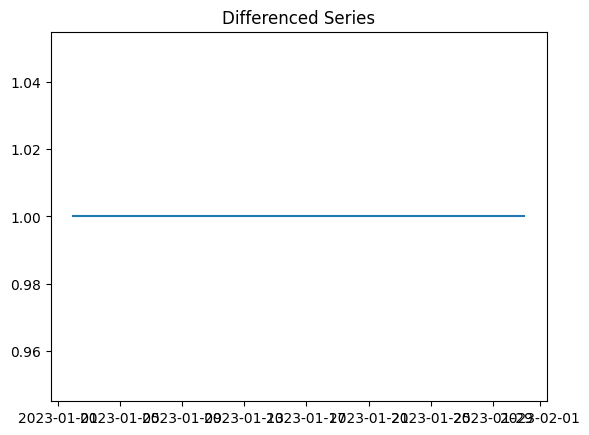

In [14]:
plt.plot(diff)
plt.title("Differenced Series")
plt.show()

#### 4. Time Series Forecasting with ARIMA
<b>What is ARIMA</b><br>
- AR -> Auto-Regression
- I -> Integreted (Differencing)
- MA -> Moving Average

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()

C:\Users\Sakshi Yadav\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sakshi Yadav\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
forecast = model_fit.forecast(steps=5)
print(forecast)

2023-02-01    30.999698
2023-02-02    31.998811
2023-02-03    32.997340
2023-02-04    33.995284
2023-02-05    34.992645
Freq: D, Name: predicted_mean, dtype: float64


#### Machine Learning Models (Supervised Learning ML for time series)

In [18]:
df = pd.DataFrame(data, columns=['value'])

In [19]:
df.head()

,value
2023-01-01,0
2023-01-02,1
2023-01-03,2
2023-01-04,3
2023-01-05,4


In [20]:
df['last1'] = df['value'].shift(1)

In [21]:
df['last2'] = df['value'].shift(2)

In [22]:
df.head()

,value,last1,last2
2023-01-01,0,NaN,NaN
2023-01-02,1,0.0,NaN
2023-01-03,2,1.0,0.0
2023-01-04,3,2.0,1.0
2023-01-05,4,3.0,2.0


In [23]:
df = df.dropna()

In [24]:
df.head()

,value,last1,last2
2023-01-03,2,1.0,0.0
2023-01-04,3,2.0,1.0
2023-01-05,4,3.0,2.0
2023-01-06,5,4.0,3.0
2023-01-07,6,5.0,4.0


In [25]:
# Import Supervised ML Model(Linear Regression)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
X = df[['last1', 'last2']]
y = df['value']

In [28]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [29]:
next_input = df[['last1', 'last2']].iloc[-1].values.reshape(1,-1)

In [30]:
print('Next Predicted Value: ', model.predict([[41,40]]))

Next Predicted Value:  [42.]


C:\Users\Sakshi Yadav\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
